##### **Project Type**    - Regression/Classification/Unsupervised


# **Project - Predict a Student's GPA!!!**

Link to example dataset: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

NOTE this is not the Kaggle competitions we will be participating in. 

For the first Kaggle series we will be 

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [37]:
# Import Libraries
import pandas as pd 
import numpy as np 

#for visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# for ml training + evaluation
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
!pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)


### Dataset Loading

In [2]:
# Load Dataset
data = pd.read_csv(r"Student_performance_data.csv")

### Dataset First View

In [3]:
# Dataset First Look
data.head()

#looks at first 5 rows 

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
data.shape

(2392, 15)

There are 2392 rows and 15 columns

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

Missing (NaN) values can distort or break model training, since most ML algorithms can’t handle them natively and may produce  invalid results if the data isn’t complete.

In [8]:
# Missing Values/Null Values Count
data.isnull().sum()

#basically checks if there are NAN/NULL values and sums all the missing values

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## 2. ***Data Wrangling***

### Data Wrangling Code

This involves cleaning the data by getting rid of NaN values. 
If there were NaN values - you would impute the missing values with either the median for numerical data or mode for categorical data. 

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1:  Distribution plot of StudyTimeWeekly

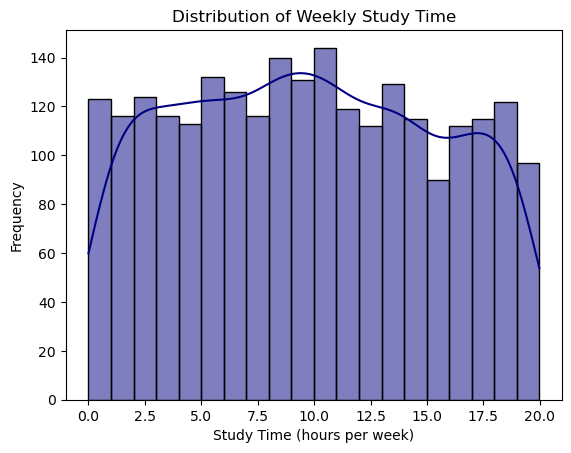

In [18]:
# Chart - 1 visualization code

# Distribution plot of StudyTimeWeekly
sns.histplot(data['StudyTimeWeekly'], kde=True, bins=20, color = 'navy')

plt.title('Distribution of Weekly Study Time')
plt.xlabel('Study Time (hours per week)')
plt.ylabel('Frequency')
plt.show()



#### Chart - 2: Pie Chart showing Ages

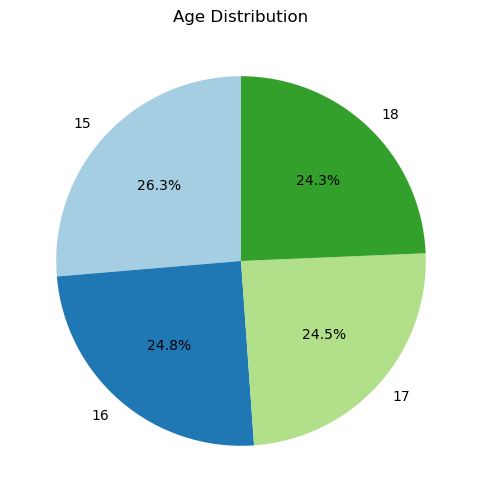

In [20]:
# Chart - 2 visualization code
# Count the frequency of each age
age_counts = data['Age'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Age Distribution')
plt.show()

#### Chart - 3: Scatter plot of Absences vs Study Time Weekly

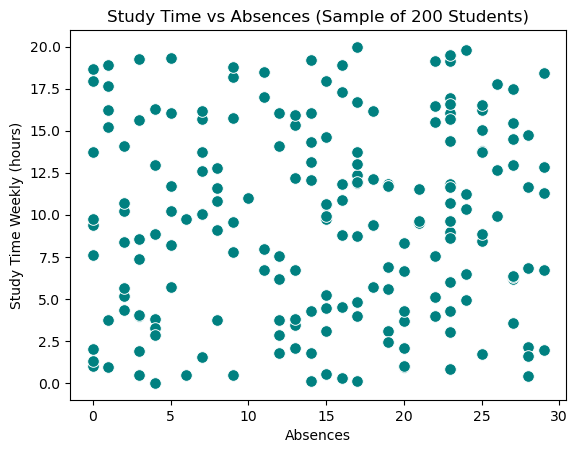

In [27]:
# Chart - 3 visualization code

sample_data = data.sample(n=200, random_state=42)

sns.scatterplot(data=sample_data, x='Absences', y='StudyTimeWeekly', color='teal', s=70)
plt.title('Study Time vs Absences (Sample of 200 Students)')
plt.xlabel('Absences')
plt.ylabel('Study Time Weekly (hours)')
plt.show()

#### Chart - 4 - Correlation Heatmap

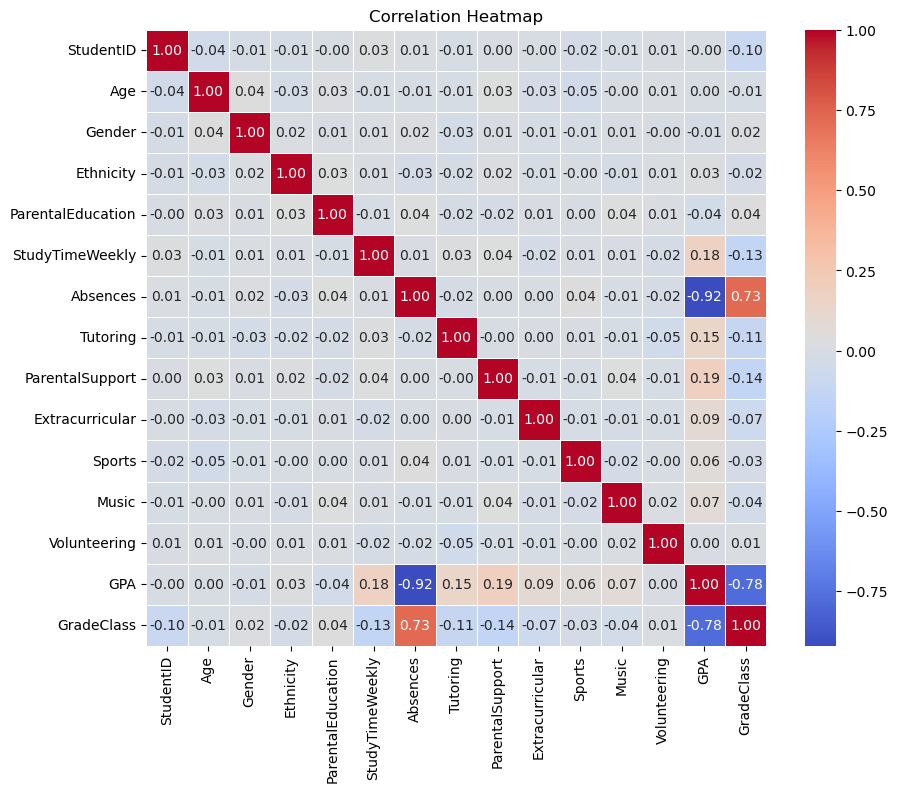

In [28]:
# Correlation Heatmap visualization code

# Compute correlation matrix
corr = data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

## ***4. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There are no missing values hence nothing needs to be done!

In [48]:
# Handling Missing Values & Missing Value Imputation

### 2. Handling Outliers (don't worry about understanding the code now)

In [30]:
# Handling Outliers & Outlier treatments

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
  
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)


### 3. Categorical 
 

In [45]:
data = pd.get_dummies(data, drop_first=True)


### 4. Data Splitting + feature engineering 

In [46]:
# Dropping columns + setting up X and Y 

X = data.drop(columns=['GradeClass'])  # Features
y = data['GPA']                        # Target for regression

In [47]:


# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## ***5. ML Model Implementation***

#### 1. label the model
#### 2. Fit the model 
#### 3. Predict
#### 4. Evaluate : how good was our model/ how accurate? 

### ML Model - 1

In [49]:
# Create and train the LightGBM regressor
#1. label the model 
lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
     verbose=-1,   # <-- This suppresses all messages
    max_depth=7,
    random_state=42
)

#2. fit the model
lgb_model.fit(X_train, y_train)

# 3. Predict on test set
y_pred = lgb_model.predict(X_test)

# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0002
R² Score: 0.9998


# **Conclusion**

### Mean Squared Error: 0.0002
### R² Score: 0.9998

#### This looks pretty good - however this is a very easy dataset as there were no missing values, duplicates etc : often results will be less accurate. 

# Submission

### In real Kaggle competitions you will have to save your predictions to a submission file.

In [ ]:
#df_sub['id'] = df_test['id']
#df_sub['accident_risk'] = y_pred_final


# Save to CSV
#df_sub.to_csv('submission.csv', index=False)

#print("submission.csv created successfully!")
#print(df_sub.head())